In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
train = pd.read_csv('train3.csv')
test = pd.read_table('test3.txt',sep=',')

C:\Users\KTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [21]:
# traget : 구매자 직업 : Occupation

In [22]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [23]:
train.shape

(399999, 12)

In [24]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [25]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [26]:
train.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [27]:
train.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

## class -> label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
enclist = []
classlist = ['Gender','Age','City_Category','Stay_In_Current_City_Years']
for cl in classlist:
    enc = LabelEncoder()
    train[cl] = enc.fit_transform(train[cl])
    enclist.append(enc)

In [29]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969


In [30]:
train.describe()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,3.999990e+05,399999.000000,399999.000000,399999.000000,399999.000000,399999.000000,399999.000000,399999.000000,275987.000000,122445.000000,399999.000000
mean,1.002973e+06,0.753559,2.492244,8.076858,1.039083,1.859640,0.410036,5.295561,9.847714,12.657373,9325.827085
std,1.741565e+03,0.430939,1.354036,6.524291,0.760489,1.290809,0.491841,3.747045,5.088701,4.128109,4975.792723
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001424e+06,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003007e+06,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,9.000000,14.000000,8061.000000
75%,1.004447e+06,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,15.000000,16.000000,12065.000000
max,1.006040e+06,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [31]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            124012
Product_Category_3            277554
Purchase                           0
dtype: int64

In [32]:
train.fillna(0, inplace=True)

In [33]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

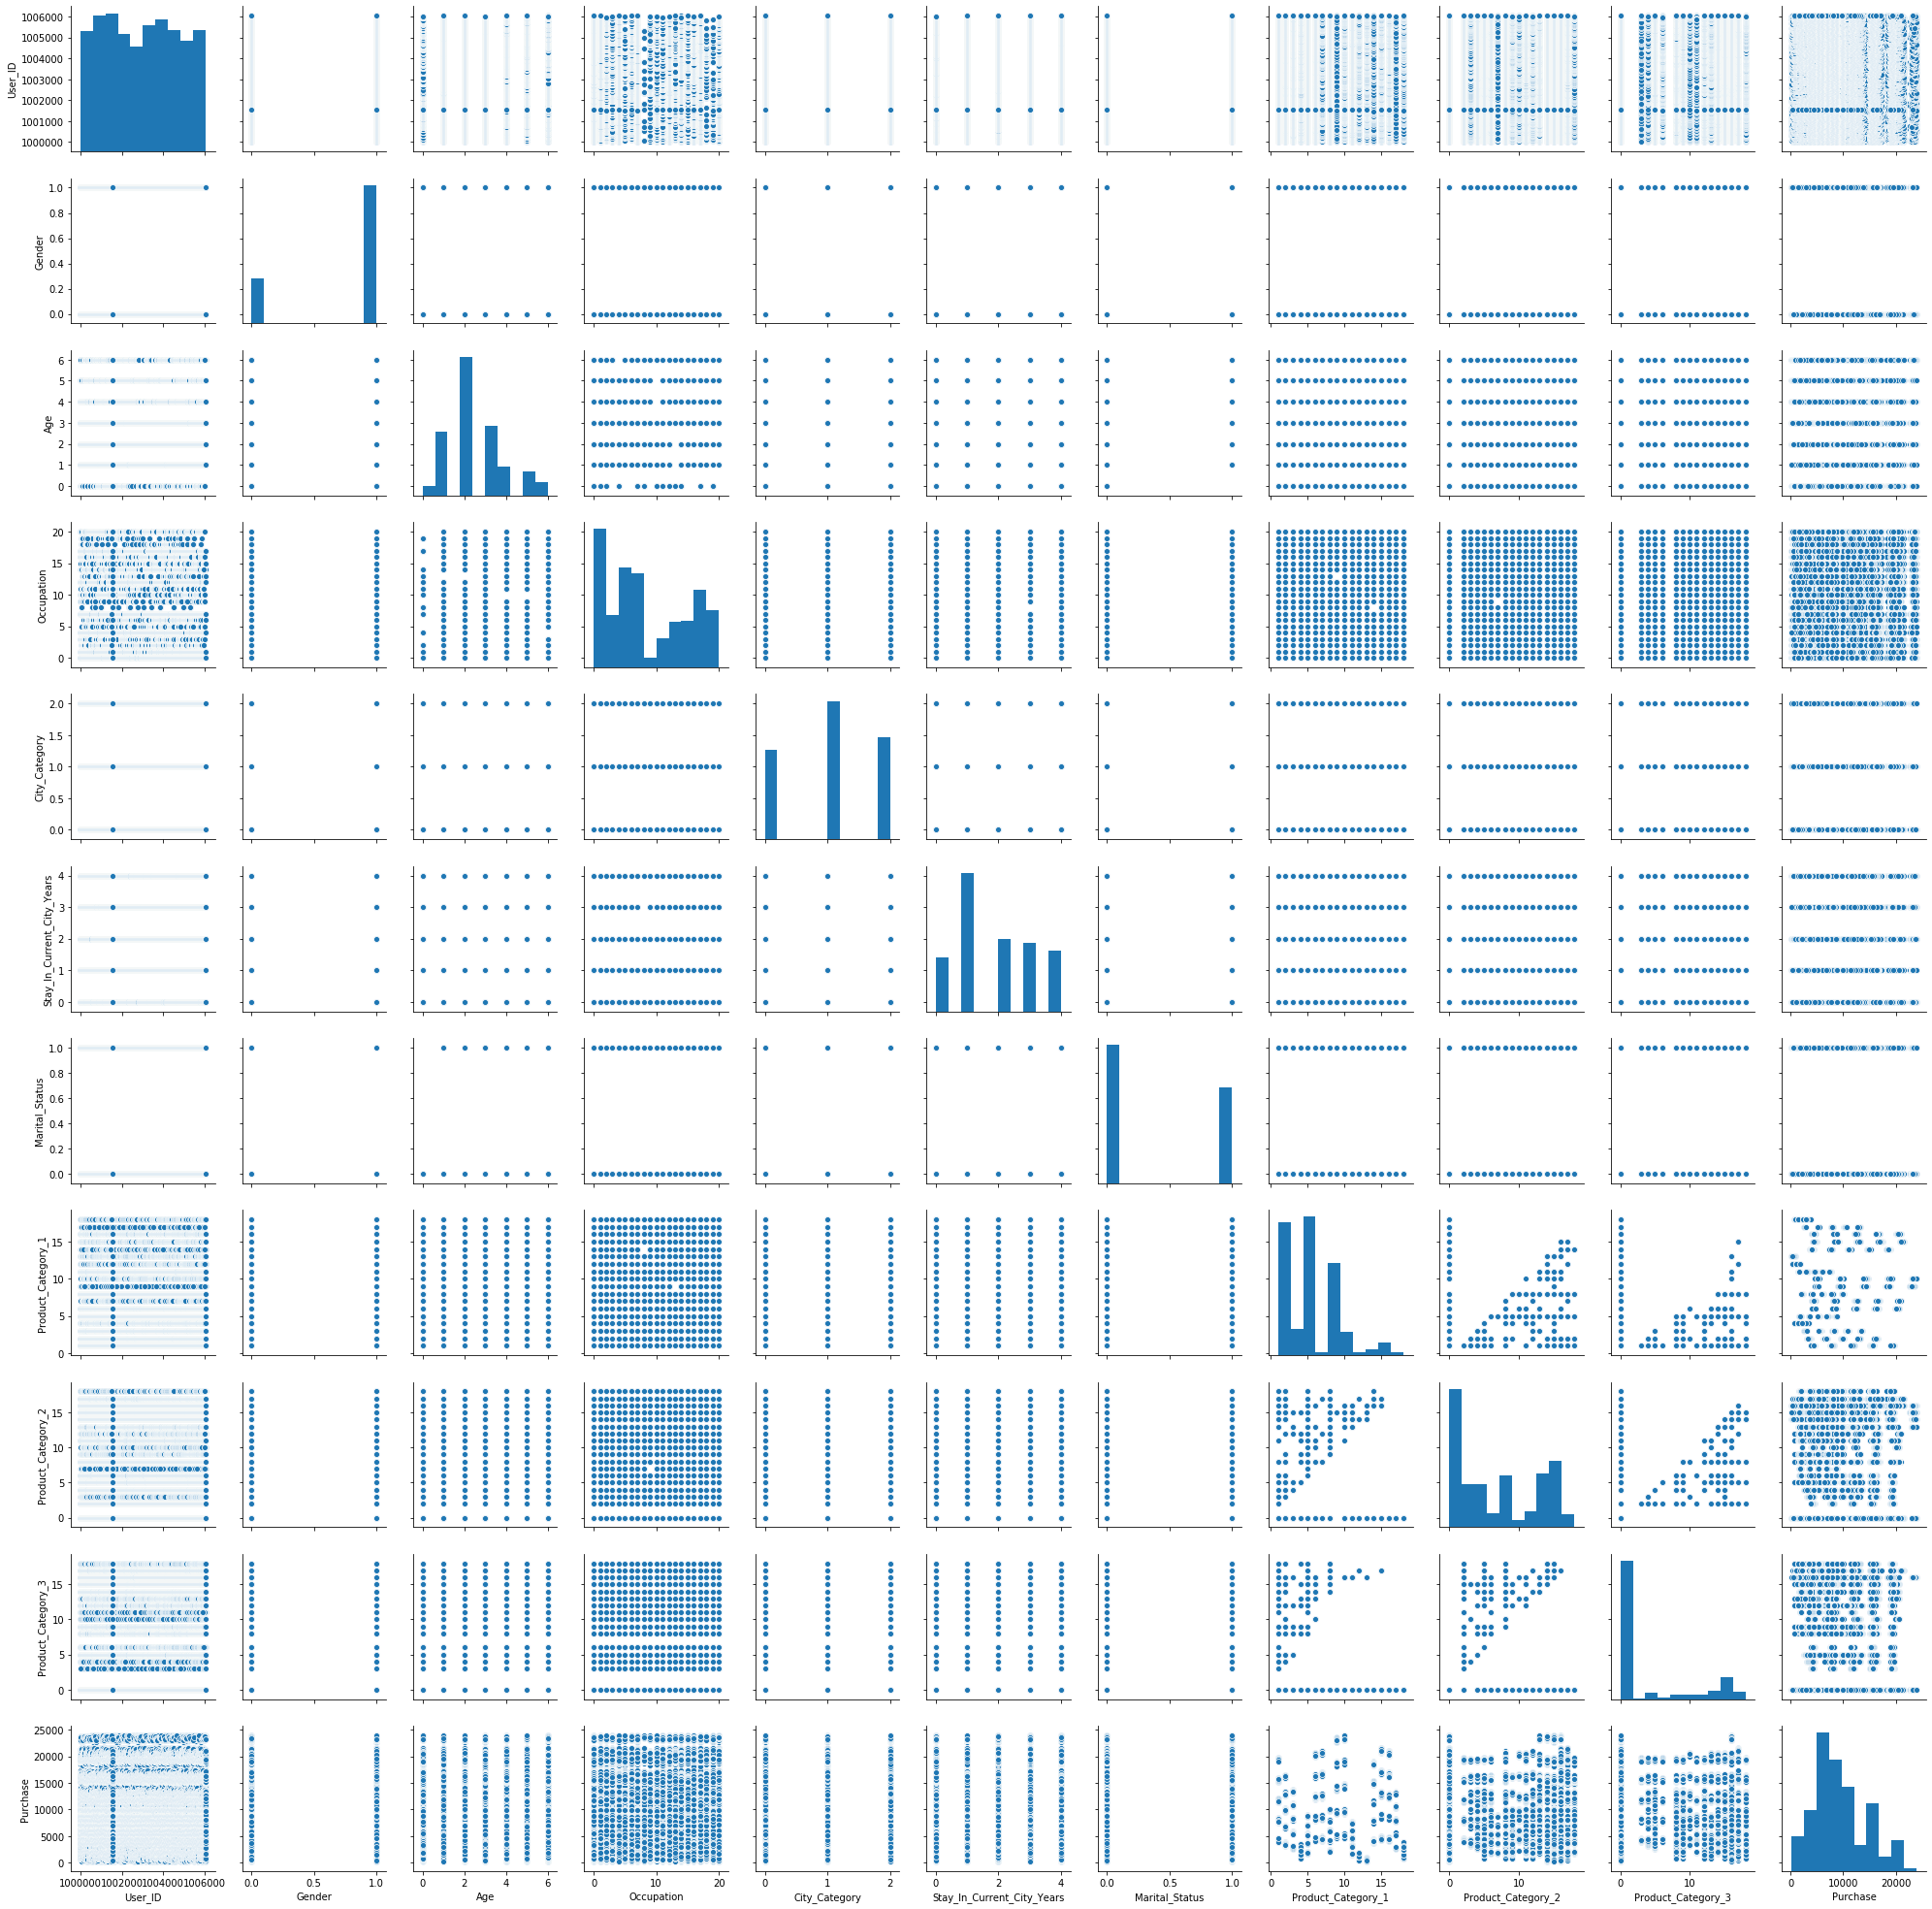

In [34]:
sns.pairplot(train)